In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind
import arviz as az
import itertools
import pingouin as pg

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-viridish")

In [3]:
women_weight = np.array([38.9, 61.2, 73.3, 21.8, 63.4, 64.6, 48.4, 48.8, 48.5])
men_weight = np.array([67.8, 60, 63.4, 76, 89.4, 73.3, 67.3, 61.3, 62.4])

weight = np.concatenate((women_weight, men_weight))
print(weight)

[38.9 61.2 73.3 21.8 63.4 64.6 48.4 48.8 48.5 67.8 60.  63.4 76.  89.4
 73.3 67.3 61.3 62.4]


In [4]:
is_female = np.repeat([1, 0], 9)
is_female

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
df = pd.DataFrame({"is_female": is_female, "weight": weight})
df

,is_female,weight
0,1,38.9
1,1,61.2
2,1,73.3
3,1,21.8
4,1,63.4
5,1,64.6
6,1,48.4
7,1,48.8
8,1,48.5
9,0,67.8


Text(0, 0.5, 'Density')

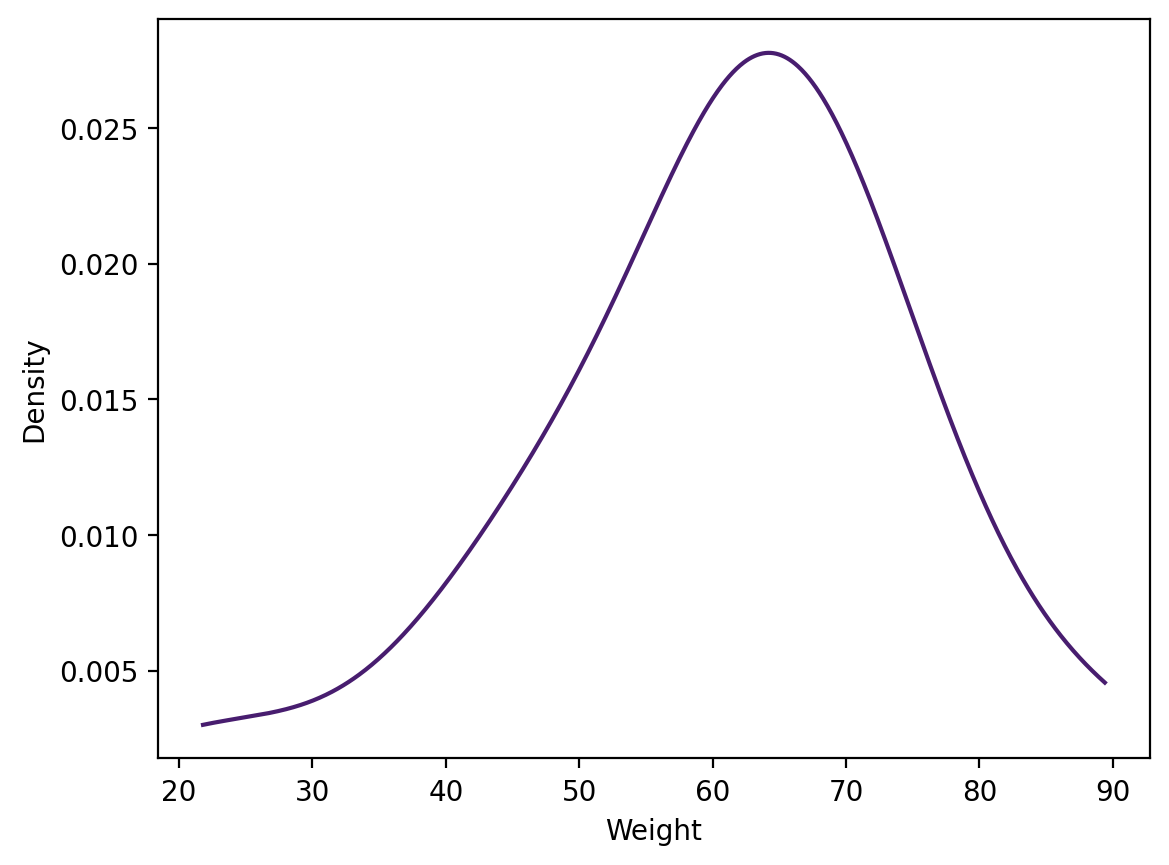

In [6]:
density = gaussian_kde(df["weight"])
x_vals = np.linspace(min(df["weight"]), max(df["weight"]), 1000)
density = density.evaluate(x_vals)

plt.plot(x_vals, density)
plt.xlabel('Weight')
plt.ylabel('Density')

In [7]:
weight_f = df.loc[df["is_female"] == 1, "weight"]
weight_m = df.loc[df["is_female"] == 0, "weight"]

In [8]:
s_pool_num = np.sum(
    [
        (len(weight_f) - 1) * np.std(weight_f, ddof=1) ** 2,
        (len(weight_m) - 1) * np.std(weight_m, ddof=1) ** 2,
    ]
)
s_pool_denom = len(weight_f) + len(weight_m) - 2

s_pool = np.sqrt(np.divide(s_pool_num, s_pool_denom))
s_pool

12.86771368796942

In [9]:
t_num = np.mean(weight_f) - np.mean(weight_m)
t_denom = s_pool * np.sqrt(1 / len(weight_f) + 1 / len(weight_m))
T = np.divide(t_num, t_denom)
T

-2.7842353699254567

In [10]:
len(weight_f) + len(weight_m) - 2

16

In [11]:
stats.t.cdf(T, df=16) * 2

0.013265602643801042

In [12]:
res = pg.ttest(weight_m, weight_f, paired=False, correction=False)
print(res)

               T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  2.784235   16   two-sided  0.013266  [4.03, 29.75]  1.312501  4.251   

           power  
T-test  0.743519  


In [13]:
%load_ext watermark
%watermark -n -u -v -iv -w -p pytensor

Last updated: Sun Sep 17 2023

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

pytensor: 2.12.3

matplotlib: 3.7.2
numpy     : 1.25.2
arviz     : 0.16.0
scipy     : 1.10.1
pingouin  : 0.5.3
pandas    : 2.0.3

Watermark: 2.4.3

